# MNIST Neural Network

### Imports

In [1]:
import tensorflow as tf
import numpy as np
import math

### Load Data and Create Model

In [2]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)


#print(np.shape([1,2,3,4]))

#print(np.shape(x_train)) #(60000,28,28)

#feed forward NN

hidden_units = 200

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(hidden_units,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

#could try sparse
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

steps_per_epoch = len(x_train)//100

11490434/11490434 [==============================] - 1s 0us/step
Metal device set to: Apple M2


2022-07-21 17:03:00.231356: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-21 17:03:00.231489: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)

#print(np.shape([1,2,3,4]))

#print(np.shape(x_train)) #(60000,28,28)

#feed forward NN

hidden_units = 200

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(hidden_units,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

#could try sparse
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

steps_per_epoch = len(x_train)//100

#### Decaying Learning Rate Function

In [4]:
# lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * math.pow(0.6,epoch), verbose=True)


### Train

In [5]:
#tf.keras.models.Sequential().fit()
model.fit(x_train,y_train,epochs=10,steps_per_epoch = steps_per_epoch)#callbacks=[lr_decay_callback])

Epoch 1/10


2022-07-21 17:03:27.094752: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-21 17:03:27.524099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 4s 4ms/step - loss: 0.2128 - accuracy: 0.9346
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1029 - accuracy: 0.9679
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0737 - accuracy: 0.9771
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0617 - accuracy: 0.9803
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0559 - accuracy: 0.9825
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0458 - accuracy: 0.9854
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0433 - accuracy: 0.9863
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0374 - accuracy: 0.9883
Epoch 9/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0346 - accuracy: 0.9895
Epoch 10/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0380 - accuracy: 0.9889


In [6]:
# print model layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (100, 784)                0         
                                                                 
 dense_2 (Dense)             (100, 200)                157000    
                                                                 
 dense_3 (Dense)             (100, 10)                 2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


### Evaluate Loss and Accuracy on Test Set

In [7]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print("loss: ",val_loss,"\n","accuracy: ",val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2202 - accuracy: 0.9654
loss:  0.22018122673034668 
 accuracy:  0.965399980545044


In [8]:
model.save('num_model')

INFO:tensorflow:Assets written to: num_model/assets


In [9]:
new_model = tf.keras.models.load_model('num_model')

In [10]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 770us/step


In [11]:
print(len(x_test))

10000


5


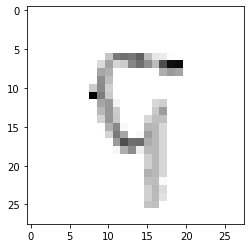

In [12]:
for i in range(len(predictions)):
    if np.argmax(predictions[i])!=y_test[i]:
        print(np.argmax(predictions[i]))
        plt.imshow(x_test[i],cmap=plt.cm.binary)
        break

In [13]:
print(np.argmax(predictions[9876]))

1


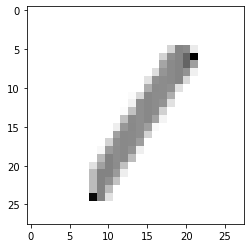

In [14]:
plt.imshow(x_test[9876],cmap=plt.cm.binary)

In [33]:
from NN_database import Database
import pandas as pd
db = Database()

connection = db.create_db_connection("140.233.160.216", "agironda", "phys_research1", "mnist_db")

select_all_query = "SELECT * FROM mnist"

results = db.read_query(connection,select_all_query)

from_db = []

for result in results:
  result = list(result)
  from_db.append(result)

columns = ["nn_id", "hidden_units", "layers", "training_size", "learning_rate",
            "decay_lr","dropout","dropout_size","epochs","batch_size","loss",
            "metrics","activation","convolutional","accuracy"]

df = pd.DataFrame(from_db, columns=columns)
df = df[df["layers"]==3]

display(df)

MySQL Database connection successful


,nn_id,hidden_units,layers,training_size,learning_rate,decay_lr,dropout,dropout_size,epochs,batch_size,loss,metrics,activation,convolutional,accuracy
40,41,300,3,60000,0.01,1,1,0.3,10,100,sparse_categorical_crossentropy,accuracy,relu,1,0.9947
41,42,300,3,5000,0.01,1,1,0.3,10,100,sparse_categorical_crossentropy,accuracy,relu,1,0.9499
42,43,300,3,10000,0.01,1,1,0.3,10,100,sparse_categorical_crossentropy,accuracy,relu,1,0.9852
43,44,300,3,15000,0.01,1,1,0.3,10,100,sparse_categorical_crossentropy,accuracy,relu,1,0.9875
44,45,300,3,20000,0.01,1,1,0.3,10,100,sparse_categorical_crossentropy,accuracy,relu,1,0.9904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,304,300,3,60000,0.01,1,1,0.3,10,560,sparse_categorical_crossentropy,accuracy,relu,0,0.9782
304,305,300,3,60000,0.01,1,1,0.3,10,570,sparse_categorical_crossentropy,accuracy,relu,0,0.9761
305,306,300,3,60000,0.01,1,1,0.3,10,580,sparse_categorical_crossentropy,accuracy,relu,0,0.9751
306,307,300,3,60000,0.01,1,1,0.3,10,590,sparse_categorical_crossentropy,accuracy,relu,0,0.9780


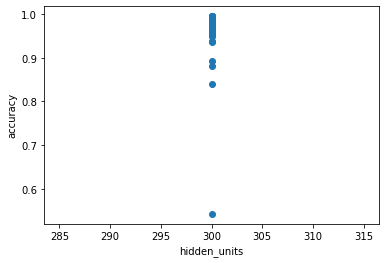

In [34]:
import matplotlib.pyplot as plt
x_var = "hidden_units"
plt.scatter(df[x_var],df["accuracy"])
plt.xlabel(x_var)
plt.ylabel("accuracy")
plt.show()

In [8]:
# lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * math.pow(0.6,epoch), verbose=True)


mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(kernel_size=3,filters=12,use_bias=False,padding='same'))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv2D(kernel_size=6,filters=24,use_bias=False,padding='same',strides=2))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv2D(kernel_size=6,filters=32,use_bias=False,padding='same',strides=2))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(200,use_bias=False))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

steps_per_epoch = len(x_train)//64

model.fit(x_train,y_train,epochs=10,steps_per_epoch = steps_per_epoch,callbacks=[lr_decay_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
  1/937 [..............................] - ETA: 5:59 - loss: 2.9777 - accuracy: 0.0769

2022-07-21 17:08:20.880168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


937/937 [==============================] - 16s 17ms/step - loss: 0.1357 - accuracy: 0.9580 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.006.
Epoch 2/10
937/937 [==============================] - 16s 17ms/step - loss: 0.0463 - accuracy: 0.9857 - lr: 0.0060

Epoch 3: LearningRateScheduler setting learning rate to 0.0036.
Epoch 3/10
937/937 [==============================] - 16s 17ms/step - loss: 0.0318 - accuracy: 0.9901 - lr: 0.0036

Epoch 4: LearningRateScheduler setting learning rate to 0.0021599999999999996.
Epoch 4/10
937/937 [==============================] - 16s 17ms/step - loss: 0.0196 - accuracy: 0.9938 - lr: 0.0022

Epoch 5: LearningRateScheduler setting learning rate to 0.001296.
Epoch 5/10
937/937 [==============================] - 16s 17ms/step - loss: 0.0138 - accuracy: 0.9957 - lr: 0.0013

Epoch 6: LearningRateScheduler setting learning rate to 0.0007775999999999998.
Epoch 6/10
937/937 [==============================] - 16s 17ms/step - loss: 0.00

In [9]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_acc)

 38/313 [==>...........................] - ETA: 1s - loss: 0.0229 - accuracy: 0.9918

2022-07-21 17:12:29.352309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.0228 - accuracy: 0.9932
0.9932000637054443


In [ ]:
model.save('num_model')

In [ ]:
new_model = tf.keras.models.load_model('num_model')

In [ ]:
predictions = new_model.predict([x_test])

In [ ]:
print(np.argmax(predictions[234]))
plt.imshow(x_test[234],cmap=plt.cm.binary)